In [2]:
#imports
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load data

tourism_df = pd.read_csv('../data/intermediate/cleaned_tourism.csv',index_col=0)
tourism_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


c:\Users\ingal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


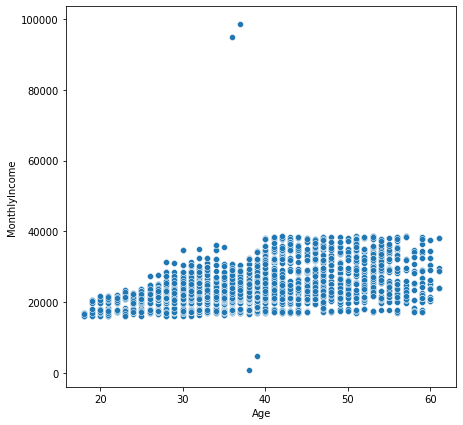

In [13]:
fig = plt.figure(figsize = (7,7));
ax = sns.scatterplot(tourism_df['Age'], tourism_df['MonthlyIncome'])

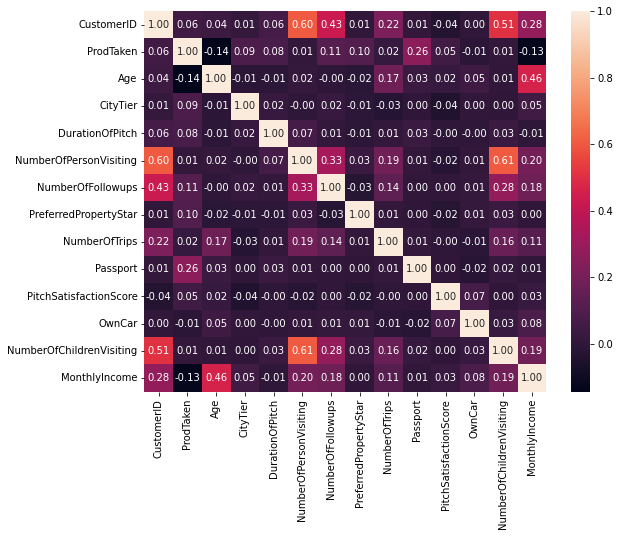

In [14]:
# heatmap
fig = plt.figure(figsize = (9,7));
sns.heatmap(tourism_df.corr(), annot = True, fmt = '.2f');

# Difference in Product Taken vs. Denied

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

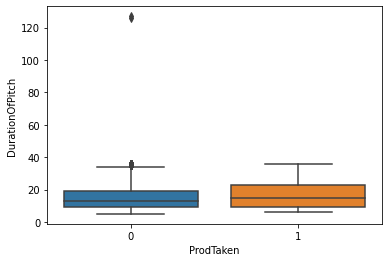

In [23]:
#comparison of product accepted based number of minutes pitching

sns.boxplot(data=tourism_df, x='ProdTaken', y='DurationOfPitch')

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

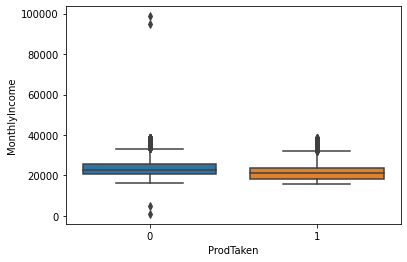

In [24]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='MonthlyIncome')

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

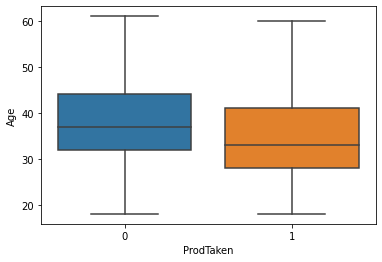

In [25]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='Age')

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfTrips'>

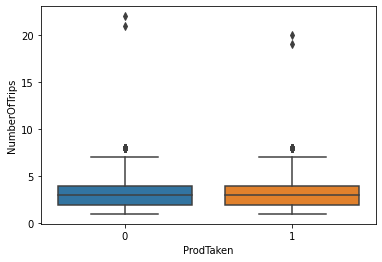

In [26]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfTrips')

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfChildrenVisiting'>

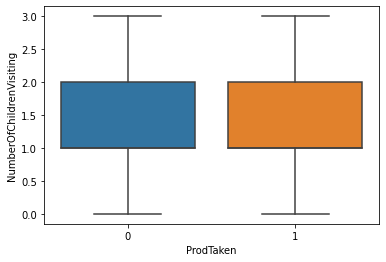

In [29]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfChildrenVisiting')

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfPersonVisiting'>

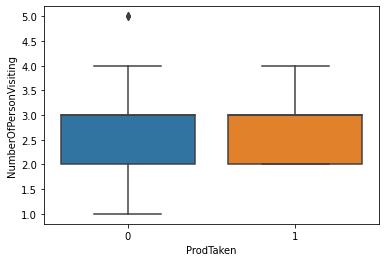

In [32]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfPersonVisiting')

<AxesSubplot:xlabel='ProdTaken', ylabel='PitchSatisfactionScore'>

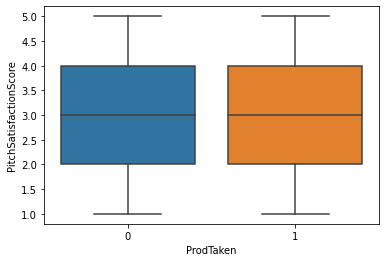

In [37]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='PitchSatisfactionScore')

As I suspected, there isn't any difference in their pitch satisfaction when they accept vs. deny the product. 

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

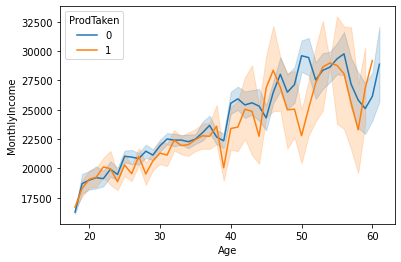

In [36]:
sns.lineplot(data=tourism_df, x= 'Age', y='MonthlyIncome',hue='ProdTaken')

There isn't a real difference in categories when the product was taken vs. not taken.

# Offers Pitched

In [39]:
tourism_df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

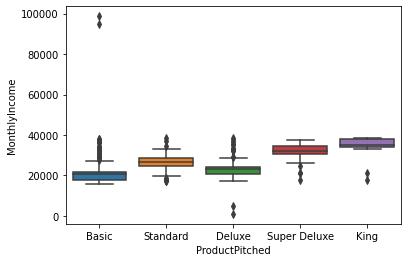

In [41]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='MonthlyIncome', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])

<AxesSubplot:xlabel='ProductPitched', ylabel='Age'>

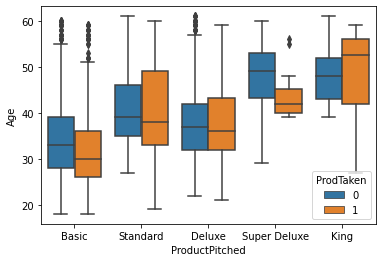

In [48]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='Age', hue = 'ProdTaken', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

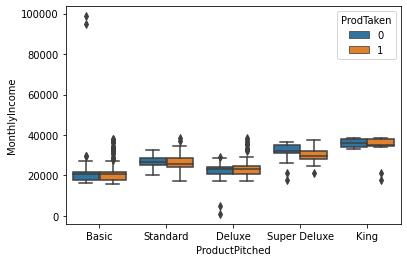

In [49]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='MonthlyIncome', hue = 'ProdTaken', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])